In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from PIL import Image
import os
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
import torchvision.datasets as dsets

import matplotlib.pyplot as plt
import os

In [2]:
#Defining the transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [3]:
#dataloader
class BSD100Dataset(Dataset):
    def __init__(self, rootdir, transform=None):

        self.root_dir = rootdir
        self.transform = transform
        self.imnames = [f for f in os.listdir(rootdir) if f.endswith('.jpg') or f.endswith('.png')]  #list the file which is ending with the .jpg or .png 


    def __len__(self):
        return len(self.imnames)   #for getting the length

    def __getitem__(self, idx):
        imname = os.path.join(self.root_dir, self.imnames[2*idx]) #seperating the training images and label images
        labelspath=os.path.join(self.root_dir, self.imnames[2*idx+1])
        image = Image.open(imname)
        labels=Image.open(labelspath)
        sample = {'image': image,'label':labels}
        #applying transformations
        if self.transform:
            sample['image'] = self.transform(sample['image'])
            sample['label'] = self.transform(sample['label'])
        return sample

In [4]:
dataset=BSD100Dataset(rootdir=r'C:\Users\soham\OneDrive\Documents\ALL TASK OF FACIAL LANDMARK PROJECT\task_5_customdataloader\BSD100\image_SRF_2', transform=transform)
#creating the batches
dataloader=DataLoader(dataset,batch_size=4,shuffle=True,num_workers=4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


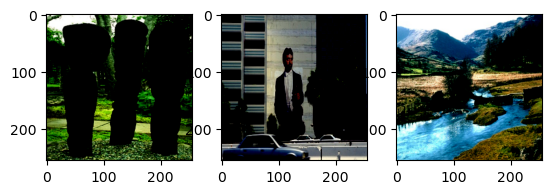

In [5]:
#showing the output
image=dataset[0]['image']
image2=dataset[10]['image']
image3=dataset[50]['image']
image = np.transpose(image, (1, 2, 0))
image2= np.transpose(image2, (1, 2, 0))
image3= np.transpose(image3, (1, 2, 0))

plt.subplot(1, 3, 1)
plt.imshow(image)

plt.subplot(1, 3, 2)
plt.imshow(image2)

plt.subplot(1, 3, 3)
plt.imshow(image3)
plt.show()